## <center>**Analyzing Indicators of Heavy Traffic on I-94**<center/>

This analysis will look at hourly data gathered along the interstate highway **[I-94](https://en.wikipedia.org/wiki/Interstate_94)**, between Minneapolis and St. Paul, Minnesota.  Additionally, this data was only collected on Westbound traffic and should not be considered indicitave of all traffic along this corridor.  Data indicators of heavy traffic are included in the dataset, represented by events such as weather, time of day and certain parts of a given week. This dataset was collected by **[John Hogue](https://www.linkedin.com/in/johnhogue)** (Director of Data Science for the **[Ovative Group](https://www.linkedin.com/company/ovative-group?trk=public_profile_experience-item_profile-section-card_subtitle-click)**) and is availalbe for download at the **[UCI Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)**.
Looking into these indicators will allow us to understand how traffic volume is affected by them.  To test if these correlations are influential or indicative of traffic variations, we will visualize our data using different types of plots, charts and graphs to accentuate the data. Please follow along and watch how different tools and visualizations can bring tabular data to life!

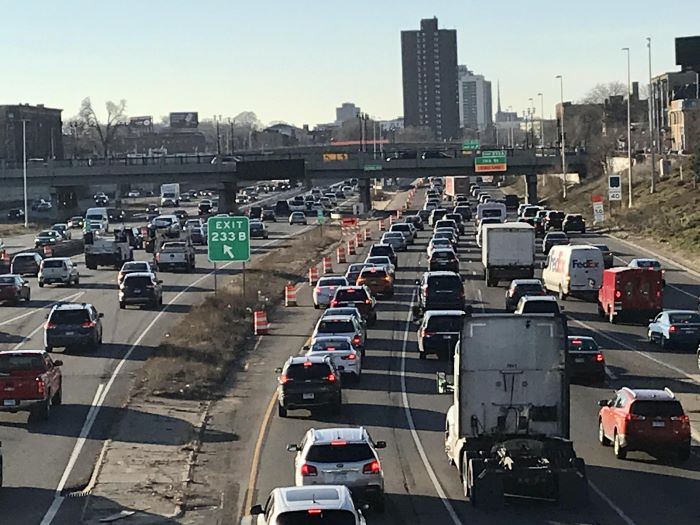**<span style='color:blue' >[Image courtesy of Sierra Club](https://www.sierraclub.org/minnesota/blog/2020/12/reconnection-revitalization-and-restitution-for-i-94-communities)</span>**

In [203]:
#read in traffic volumes using pandas
import pandas as pd

metro_traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

#read first 5 rows

metro_traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [204]:
#read last five rows

metro_traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [205]:
#explore metro_traffic for data types 

metro_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


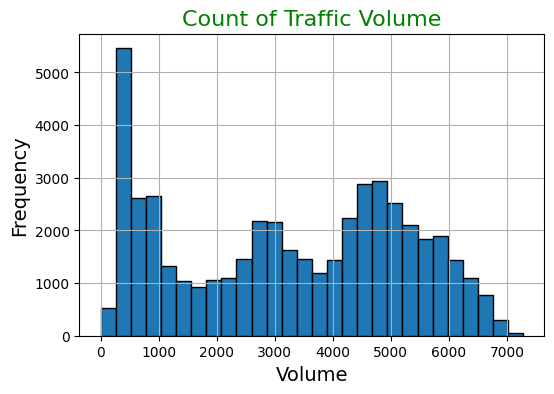

In [206]:
#import matplotlib to create a histogram for the column, traffic_volume

import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(metro_traffic['traffic_volume'],bins = 28,edgecolor = 'black')
plt.grid()
plt.title('Count of Traffic Volume',size = 16, color = 'green')
plt.xlabel('Volume',size = 14)
plt.ylabel('Frequency',size = 14)
plt.show()

In [207]:
# investigate characteristics of metro_traffic['traffic_volume'] column

metro_traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## What Does Volume Tell Us?

- After creating a histogram for `traffic_volume` we are able to see that the range of values rises and falls roughly three times creating a multi-modal distribution across the histogram.  
- This suggests a consistent theme in the volume of traffic for both highs and lows.  
- Perhaps a good way to see if there's contributing evidence to this phenomenon would be to look at another column of data, such as `date_time`, to determine an additional effect on volume and counts.

In [208]:
#convert the date_time column to a usable format for day and night comparisons

metro_traffic['date_time'] = pd.to_datetime(metro_traffic['date_time'])

#isolate hours 7 a.m. - 7 p.m. (day) 

day_time = metro_traffic.copy()[(metro_traffic['date_time'].dt.hour >=7) & (metro_traffic['date_time'].dt.hour <19)]
print(day_time.shape)

#isolate hours 7 p.m. - 7 a.m.(night)

night_time = metro_traffic.copy()[(metro_traffic['date_time'].dt.hour >=19) | (metro_traffic['date_time'].dt.hour <7)]
print(night_time.shape)

(23877, 9)
(24327, 9)


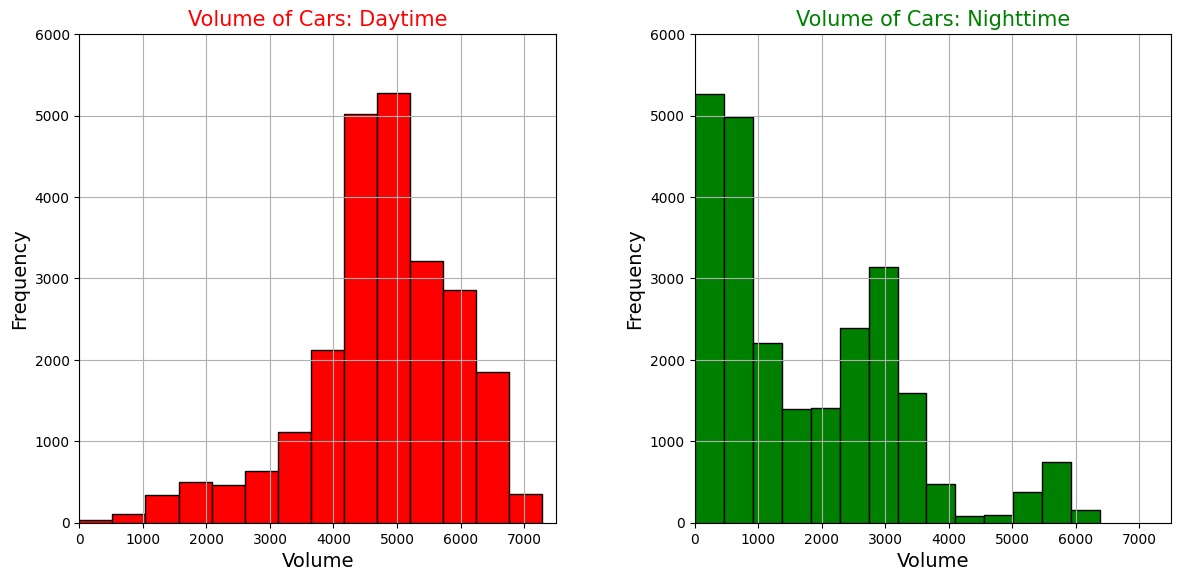

In [209]:
#create side by side histograms to illustrate the differing volumes based on time of day

plt.figure(figsize = (13,7))

plt.subplot(1,2,1)
day_time['traffic_volume'].plot.hist(grid = True, bins = 14,color = 'red', edgecolor = 'black')
plt.title('Volume of Cars: Daytime',size = 15, color = 'red')
plt.ylabel('Frequency',size = 14)
plt.xlabel('Volume',size = 14)
plt.xlim(0,7500)
plt.ylim(0,6000)

plt.subplot(1,2,2)
plt.title('Volume of Cars: Nighttime',size = 15, color = 'green')
night_time['traffic_volume'].plot.hist(grid = True, bins = 14,color = 'green', edgecolor = 'black')
plt.ylabel('Frequency',size = 14)
plt.xlabel('Volume',size = 14)
plt.xlim(0,7500)
plt.ylim(0,6000)
plt.tight_layout(pad = 5)
plt.show()

In [210]:
#take a look at night_time and day_time to see characteristic differences

day_time['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [211]:
night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

## Night vs. Day
- After visulizing both `day_time` and `night_time`, side by side, we can clearly see the difference in the volume of cars that are passing the **[ATR (Autmatic Traffic Recorder)](https://www.fhwa.dot.gov/clas/ctip/traffic_monitoring_guidebook/ch_4.aspx)**.  
- Volume for `day_time` suggests that the average (mean) is close to three and a half times that of `night_time` volume.  
- This seems pretty logical considering most people work during the day, commute within similar time windows and commerce (shipping, trucking and delivery) which occurs within this range as well.  
- While the dataset is straighforward in this regard, it does not suggest that time of day is the only contributing factor.  
- The best way to prove if this is true is to determine if other factors contribute to heavy traffic.  
- By looking at specific times (months, hours etc.) weather, precipitation and holiday listings we may be able to see that heavy traffic is affected by these phenomena.

In [212]:
#this is a quick look at how to break down months for day_time

day_time['month'] = day_time['date_time'].dt.month
by_month = day_time.groupby('month').mean()
by_month['traffic_volume']
print(by_month['traffic_volume'])

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64


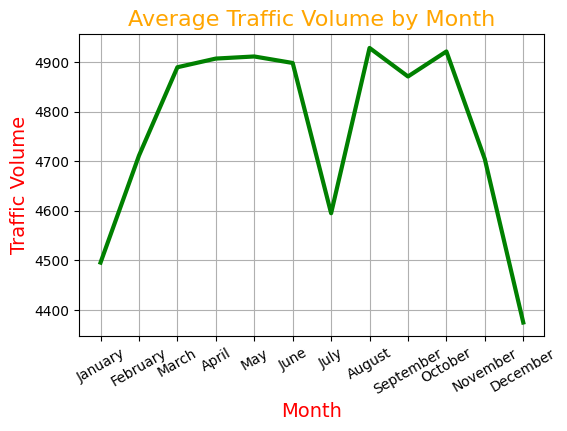

In [213]:
#generate a line plot to see how monthly traffic changed based on the means created 

plt.plot(by_month['traffic_volume'],color ='g',linewidth = 3)
plt.grid()
plt.xlabel('Month',size = 14, color = 'r')
plt.ylabel('Traffic Volume',size = 14, color = 'r')
plt.title('Average Traffic Volume by Month',size = 16, color = 'orange')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'],rotation= 30)
plt.show()

## Zooming in on Months

- When viewing the line plot `by_month['traffic_volume']` for mean traffic volume it's noticeable that the lower points coincide with major holidays. 
- Ex. July 4th, Thanksgiving (Nov.),Christmas(Dec.) and New Year(Jan.).
- Of those months, also to note, is the fact that they are winter months (except July) and could be affected by weather creating smaller mean numbers based on adverse weather conditions precluding normal travel flow.  
- Perhaps this is a valid correlation?  Further analysis is required.  
- Let's look at days of the week mean characteristics.<br/>

In [214]:
#create a new series for day of the week average volume

day_time['dayofweek']= day_time['date_time'].dt.dayofweek
by_day = day_time.groupby('dayofweek').mean()
by_day['traffic_volume']
print(by_day['traffic_volume'])

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64


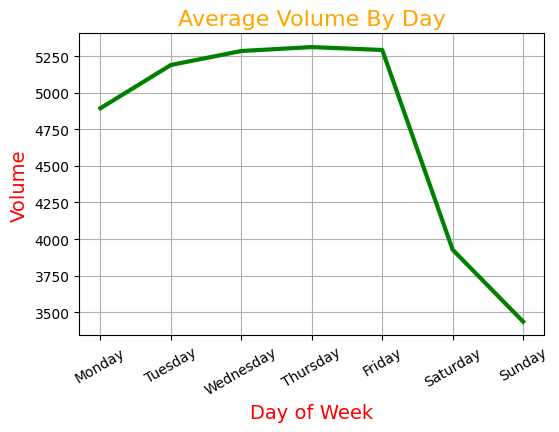

In [215]:
#create a plot line to observe noticable trends in volume by day

plt.plot(by_day['traffic_volume'],color = 'g',linewidth = 3)
plt.grid()
plt.title('Average Volume By Day',size = 16,color = 'orange')
plt.xlabel('Day of Week',size = 14, color = 'r')
plt.ylabel('Volume',size = 14, color = 'r')
plt.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation = 30)
plt.show()

## Narrowing Down to Days

- Looking at the `by_day['traffic_volume']` we can see a huge drop off in the average volume of cars once the weekend hits.  
- This, again, reinforces our guess that traffic is lessened by days of the week, time, holidays and presumably weather. 
- Let's dig a little deeper on time, first, and look at specific times of day.<br>

In [216]:
#create a new series, day_time['hour'] to help identify characteristics of volume
#in the same time frames on weekdays vs. weekends

day_time['hour'] = day_time['date_time'].dt.hour
business_days = day_time.copy()[day_time['dayofweek']<=4]
weekend = day_time.copy()[day_time['dayofweek']>=5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


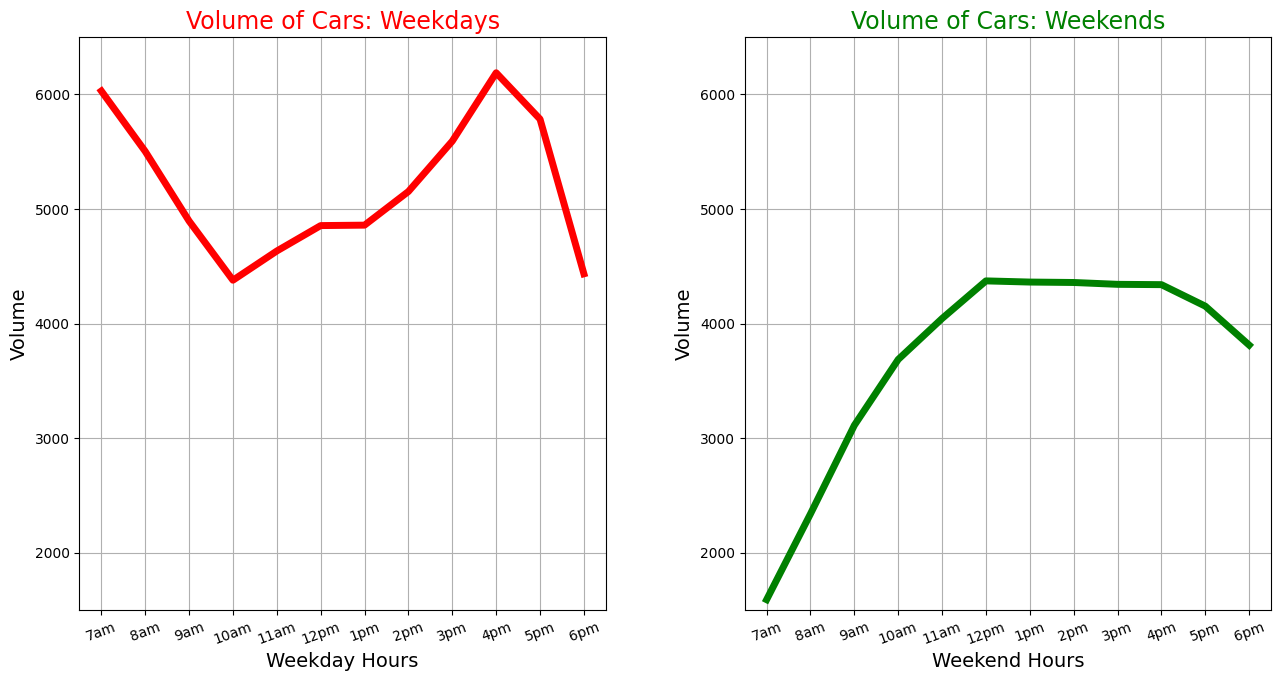

In [217]:
#comparing line plots of weekday hours of volume vs. weeked hours of volume

plt.figure(figsize = (14,8))

#weekday plot

plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'], color = 'red',linewidth = 5)
plt.grid()
plt.title('Volume of Cars: Weekdays',size = 17, color = 'red')
plt.ylabel('Volume',size = 14)
plt.xlabel('Weekday Hours',size = 14)
plt.xlim(6.5,18.5)
plt.ylim(1500,6500)
plt.xticks([7,8,9,10,11,12,13,14,15,16,17,18],['7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm'],rotation = 20)

#weekend plot

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'],color = 'green',linewidth = 5)
plt.grid()
plt.title('Volume of Cars: Weekends',size = 17, color = 'green')
plt.ylabel('Volume',size = 14)
plt.xlabel('Weekend Hours',size = 14)
plt.xlim(6.5,18.5)
plt.ylim(1500,6500)
plt.xticks([7,8,9,10,11,12,13,14,15,16,17,18],['7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm'],rotation = 20)
plt.tight_layout(pad = 5)
plt.show()

## Differing Volumes for Weekends and Weekdays

- Looking at the graphs for `by_hour_business` and `by_hour_weekend` highlight how weekday volume is significantly higher. 
- So much, in fact, that the highest volume on a weekend only reaches the lowest volume on a weekday.  
- Rush hour times are highest at 7am and 4 pm, but we haven't looked at earlier times (before 7am) to see if, perhaps, the height of rush hour is sooner.  
- The busiest times on weekeds are from 12pm to 4pm, which could point to people getting out to lunch, the store, errands or generally just getting out of the house at midday.  

In [218]:
#let's look at the correlation values between traffic_volume and numerical weather columns

(metro_traffic.corr())

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


## Correlation and Weather Measurements

- When we looked at the `metro_traffic`  dataframe in terms of correlation values it opened up another perspective, besides temporal variables, that could play a role in how they influence traffic volume.  When we compare correlation values between colums we are investigating what are known as correlation coefficients.  Correlation coefficients have a range between -1 and 1. Any value greater than zero is said to be positive correlation relationship reflected by both values from the x and y axis increasing with each other.  The closer these values get to 1 the stronger the relationship becomes.  Conversely any value less than zero is said to be a negative correlation and behaves similarly to a positive correlation relationship except that the values are approaching -1 and one value is decreasing while the other is increasing.  A value of 0, or close to it, is said to have no relationship. In the dataframe above we can see that the `temp` column has the strongest postive relationship with `traffic_volume`.  
- In order to see this more clearly we will create a scatter plot to visualize this newly found relationship. 
- When the data was downloaded, the `temp` column was listed in Kelvin.  
- In order to see a wider range of temperatures we'll convert the column to Fahrenheit using the following forumula **<span style='color:blue' >(K − 273.15) × 9/5 + 32 = F°</span>**.

In [219]:
#create a new column called temp_fahrenheit by converting column temp

metro_traffic['temp_fahrenheit'] = ((metro_traffic['temp'] - 273.15) * (9/5)+32)

#verify that the conversion was successfull

print(metro_traffic['temp_fahrenheit'])

#check for outliers

metro_traffic['temp_fahrenheit'].describe()

0        59.234
1        61.178
2        61.574
3        62.564
4        64.382
          ...  
48199    50.540
48200    49.298
48201    49.244
48202    48.092
48203    48.146
Name: temp_fahrenheit, Length: 48204, dtype: float64


count    48204.000000
mean        46.500567
std         24.008817
min       -459.670000
25%         30.218000
50%         48.740000
75%         65.580800
max         98.456000
Name: temp_fahrenheit, dtype: float64

Based on the results from the `temp_fahrenheit.describe()` it appears that there's some outliers, specifically a minimum temperature of -459 degrees F.  This is an impossibility and will be disregarded as an outlying value for the scatter plot.

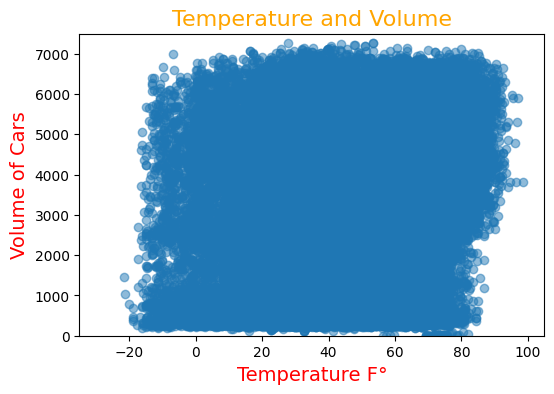

In [220]:
#create a scatter plot for the correlation of traffic_volume and temp_fahrenheit

plt.scatter(metro_traffic['temp_fahrenheit'],metro_traffic['traffic_volume'],alpha = .5)
plt.xlim(-35,105)
plt.ylim(0,7500)
plt.title('Temperature and Volume',size = 16, color = 'orange')
plt.xlabel('Temperature F\N{DEGREE SIGN}',size = 14, color = 'r')
plt.ylabel('Volume of Cars',size = 14, color = 'r')
plt.show()

## Understanding Temperature and Volume

- Based on the scatter plot created for `temp_fahrenheit` it appears that temperature isn't showing specific influences on traffic across the board. 
- Let's group all of the numerical weather columns together, side by side, to see if any of them show strong correlative effects on traffic.

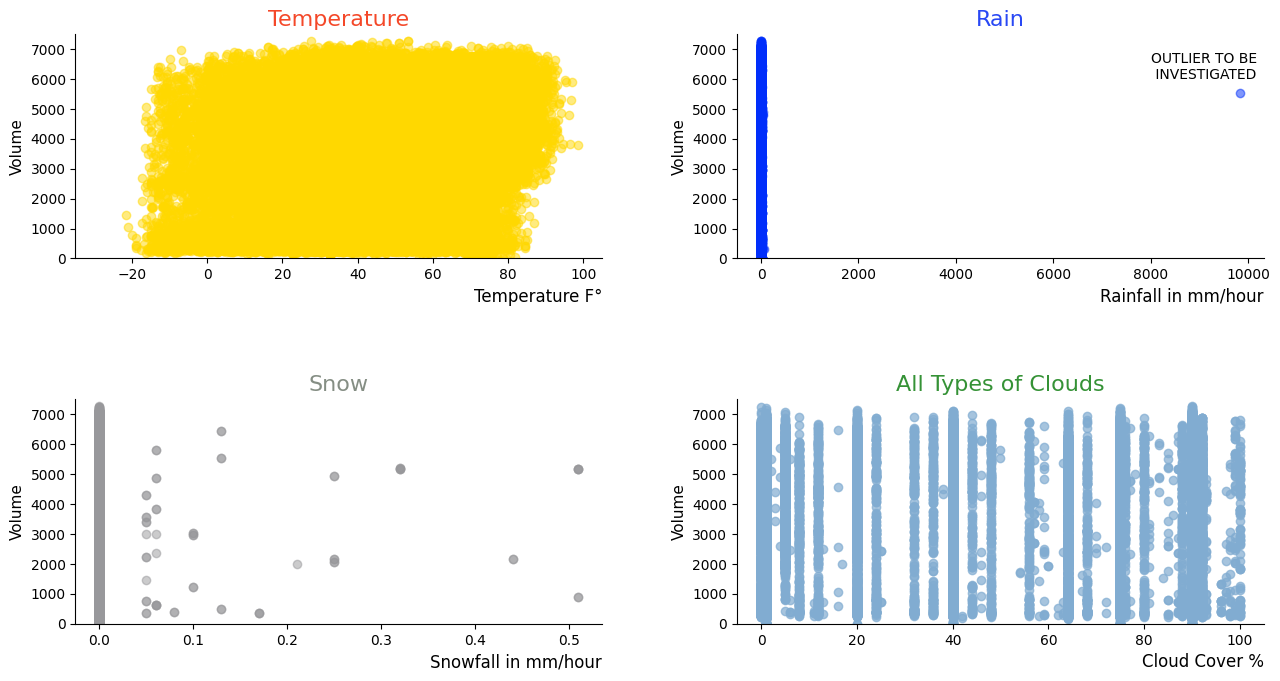

In [221]:
#set up a quadrant of numerical weather scatter plots against traffic_volume

plt.figure(figsize = (14,8))

#temperature plot

plt.subplot(2,2,1)
plt.scatter(metro_traffic['temp_fahrenheit'],metro_traffic['traffic_volume'],alpha = .5,color = '#ffd800')
plt.title('Temperature', size = 16, color = '#f44829')
plt.xlim(-35,105)
plt.ylim(0,7500)
plt.xlabel('Temperature F\N{DEGREE SIGN}', size = 12, horizontalalignment='right', x = 1)
plt.ylabel('Volume',size = 11)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#rain plot

plt.subplot(2,2,2)
plt.scatter(metro_traffic['rain_1h'],metro_traffic['traffic_volume'],alpha = .5, color ='#002efb')
plt.title('Rain',size = 16, color = '#2948f4')
plt.ylim(0,7500)
plt.xlabel('Rainfall in mm/hour', size = 12, horizontalalignment='right', x = 1)
plt.ylabel('Volume',size = 11)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.text(8000,6000,'OUTLIER TO BE\n INVESTIGATED')

#snow plot

plt.subplot(2,2,3)
plt.scatter(metro_traffic['snow_1h'],metro_traffic['traffic_volume'],alpha = .5, color =  '#98989b')
plt.title('Snow',size = 16, color = '#858e84')
plt.ylim(0,7500)
plt.xlabel('Snowfall in mm/hour', size = 12, horizontalalignment='right', x = 1)
plt.ylabel('Volume',size = 11)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#cloud cover plot

plt.subplot(2,2,4)
plt.scatter(metro_traffic['clouds_all'],metro_traffic['traffic_volume'],alpha = .7,color = '#81acd1')
plt.title('All Types of Clouds', color =  '#359236' ,size = 16)
plt.ylim(0,7500)
plt.xlabel('Cloud Cover %', size = 12, horizontalalignment='right', x = 1)
plt.ylabel('Volume',size = 11)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout(pad = 5)
plt.show()

## What's Happening With Weather Outliers?

- After plotting all four weather related scenarios it's clear that the impacts weather had were, for the most part, negligible compared to time of day.  
- One point that stands out, though, among these is the column for `rain` that has an outlier of 10,000 mm showing.  
- If that value is true that would be approximately 32 feet of water, suggesting a massive flood event or an erroneous data entry.  
- Let's take a look just to make sure before we move on.

In [222]:
#find highest amount of mm of rain and look over date and other info

metro_traffic.loc[metro_traffic['rain_1h'].idxmax()]

holiday                               None
temp                                302.11
rain_1h                             9831.3
snow_1h                                  0
clouds_all                              75
weather_main                          Rain
weather_description        very heavy rain
date_time              2016-07-11 17:00:00
traffic_volume                        5535
temp_fahrenheit                     84.128
Name: 24872, dtype: object

## How Much Rain Can Fall in July?

- While the likelihood of 32 feet of rain in an hour is a near impossibility, inches in an hour is highlty likely.  This date was investigated and found to have a flash flood on July 11th and 12th of 2016.  Here is an article from the **[Minnesota Department of Natural Resources](https://www.dnr.state.mn.us/climate/journal/160711_12_flood.html)** that deserves a deeper dig to see if, in fact, the July drop in volume was directly affected by this event or any others happening around the same time.  
- Let's take a look at 10 days on either side of July 11th to see if volume was adversely affected by weather or scenarios like roadwork or closures. 
- We can attempt to verify either of these by looking deeper into specific days within the dataframe and do some internet research for these date ranges.  

In [223]:
#verify date range on front side of July 11th for examination starting July 1st at midnight

metro_traffic.iloc[24582:25127].head()
                                

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,temp_fahrenheit
24582,None,289.04,0.0,0.0,1,Clear,sky is clear,2016-07-01 00:00:00,825,60.602
24583,None,288.16,0.0,0.0,1,Clear,sky is clear,2016-07-01 01:00:00,531,59.018
24584,None,286.64,0.0,0.0,1,Clear,sky is clear,2016-07-01 02:00:00,381,56.282
24585,None,285.39,0.0,0.0,1,Clear,sky is clear,2016-07-01 03:00:00,406,54.032
24586,None,284.67,0.0,0.0,1,Clear,sky is clear,2016-07-01 04:00:00,790,52.736


In [224]:
#verify date range on back side of July 11th for examination ending July 21st at 11:00 p.m.

metro_traffic.iloc[24582:25127].tail()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,temp_fahrenheit
25122,None,304.47,0.0,0.0,40,Clouds,scattered clouds,2016-07-21 19:00:00,3053,88.376
25123,None,302.99,0.0,0.0,20,Haze,haze,2016-07-21 20:00:00,2721,85.712
25124,None,300.90,1.2,0.0,20,Rain,moderate rain,2016-07-21 21:00:00,2619,81.950
25125,None,299.01,0.0,0.0,20,Clouds,few clouds,2016-07-21 22:00:00,2026,78.548
25126,None,297.16,0.0,0.0,1,Clear,sky is clear,2016-07-21 23:00:00,1288,75.218


In [225]:
#look at a span of days(10) on either side of July 11th, 2016 as well as a look for road work/closures
#by doing some internet searches for adverse traffic during this span

metro_traffic.iloc[24582:25127].describe()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,temp_fahrenheit
count,545.000000,545.000000,545.0,545.000000,545.000000,545.000000
mean,295.132565,18.249376,0.0,44.447706,2949.921101,71.568617
std,4.428605,421.118814,0.0,35.971362,1735.228865,7.971489
min,283.240000,0.000000,0.0,0.000000,1.000000,50.162000
25%,292.282000,0.000000,0.0,1.000000,1209.000000,66.437600
50%,295.090000,0.000000,0.0,40.000000,2987.000000,71.492000
75%,297.888000,0.000000,0.0,75.000000,4394.000000,76.528400
max,306.370000,9831.300000,0.0,92.000000,6133.000000,91.796000


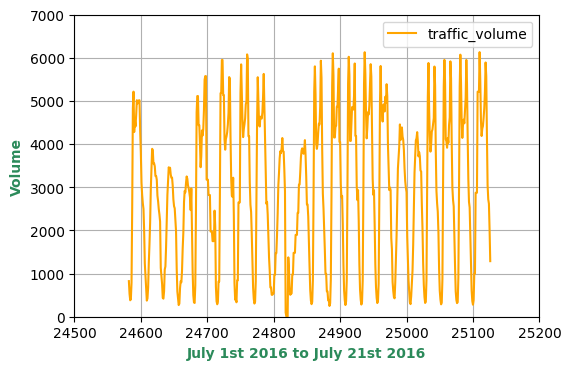

In [226]:
#plot the slice of metro_traffic from July 1st to July 21st 2016

metro_traffic.iloc[24582:25127].plot(y = 'traffic_volume',color = 'orange',grid = True)
plt.ylim(0,7000)
plt.xlim(24500,25200)
plt.ylabel('Volume', color = '#2b8a5a',fontweight = 'bold')
plt.xlabel('July 1st 2016 to July 21st 2016', color = '#2b8a5a',fontweight = 'bold')
plt.show()

## What Was Unique About July of 2016?

- While we wanted to find significant traffic revisions, only one was found as I-94 was to be reduced to one lane, both ways from 5pm, July 22nd until Sunday July 24th **[I-94 Roadwork](https://www.mprnews.org/story/2016/07/22/i94-stpaul-shutdown-twin-cities-weekend-road-woes)**.  This is a possible slow down, but not enough to drop the average, across six years.
- When this plot was built the idea was to see if there were any anomolies that may help reinforce volume fluctations based on weather. The plot for traffic volume over 21 days in July of 2016 looks fairly consistent, but it should be noted that within that span there were many duplicate entries in traffic volume, suggesting that additional entries, across the dataframe, *could* have an impact on traffic volumes. 

- This was easy to see when viewing the `metro_traffic.iloc[24582:25127].describe()`results above. 

- The count shows 545,which should correspond to the number of rows, which represent the number of one hour periods over which the data was gathered.  However, 21 days with 24 collection times per day will only yield 504 (21 days * 24 hourly periods) hourly collections.  This shows an excess of counts (44 extra) grouped into the same time period.  
- This could be something that may affect the means (such as the July dip in the plot from earlier in the project).  Examples of these repeats are shown below.


In [227]:
#looking at examples of repeating values in the 10 day ranges on either side of July 11th 2016

metro_traffic.iloc[24697:24710] 

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,temp_fahrenheit
24697,None,300.79,0.00,0.0,75,Rain,light rain,2016-07-05 17:00:00,5577,81.752
24698,None,300.79,0.00,0.0,75,Thunderstorm,proximity thunderstorm,2016-07-05 17:00:00,5577,81.752
24699,None,297.44,0.00,0.0,90,Thunderstorm,proximity thunderstorm,2016-07-05 18:00:00,3177,75.722
24700,None,297.44,0.00,0.0,90,Mist,mist,2016-07-05 18:00:00,3177,75.722
24701,None,297.44,0.00,0.0,90,Rain,light rain,2016-07-05 18:00:00,3177,75.722
24702,None,294.91,7.62,0.0,90,Rain,heavy intensity rain,2016-07-05 19:00:00,2821,71.168
24703,None,294.91,7.62,0.0,90,Thunderstorm,proximity thunderstorm,2016-07-05 19:00:00,2821,71.168
24704,None,294.91,7.62,0.0,90,Mist,mist,2016-07-05 19:00:00,2821,71.168
24705,None,293.53,6.35,0.0,90,Rain,heavy intensity rain,2016-07-05 20:00:00,1975,68.684
24706,None,293.53,6.35,0.0,90,Thunderstorm,proximity thunderstorm,2016-07-05 20:00:00,1975,68.684


## Repeating Values Found in the Dataframe

- Viewing the range above gives an indication of the types of repeats mentioned before.  Notice `date_time` and `traffic_volume` are the same in groups of two and three.  
- This was a random pattern across the chosen range between July 1st 2016 to July 21st 2016.  

- Interestingly, this led to the question of whether or not the hourly collection method was consistent across the dataframe and, if not, could it be the reason that the original months plot showed noticeable volume changes in July and the winter months? Perhaps.  But it should be noted that those statistics were only for day time hours and not across the whole day. 

- Just to dig a little deeper let's see if the count across the data frame is consistent with the number of hourly periods over the course of the **[UCI Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)** dataset we've been working on.

In [228]:
#number of rows in metro_traffic dataframe

len(metro_traffic)

48204

## Comparing Number of Collection Periods Possible

- To see if there's some differences in row counts versus hourly time periods across this dataframe we can calculate the span of the study (October 2nd 9:00 a.m 2012 to September 30th 11:00 p.m. 2018).  That's a period short of six years by about two days plus the consideration that 2016 was a leap year. Let's calculate the total number of hours of observation for that time period.

- 5 years, 363 days, 14 hours = 5(365) + 363 = 2188 days, 14 hours

- 1 Leap Year 2016 = +1 day = 24 hours

- Total Number of 24 hour data collection periods = (2189 days * 24 collections per day) + 14 hours---->>> 52,550 collection periods.

- When compared to the number of rows in metro_traffic (48,204) we can see a considerable amount of collection differential(4,346). When visiting the UCI Learning Repository for this dataset one note in the abstract highlights the following -  **missing data = ?**.  Perhaps looking further will illuminate some trends in volume and frequency noted earlier in the project.  



## 

## <center>Removal of Duplicates
    
- Let's focus on these duplicates, remove them and perform the same analysis we did at the begining of the project to see if the month of July dip changes after we remove them.

In [229]:
#test theory of repeating data

test_metro = metro_traffic.copy()

test_metro.drop_duplicates(subset = ['date_time'], keep = 'first', inplace = True)

test_metro.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,temp_fahrenheit
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,281.316763,0.318632,0.000117,44.199162,3290.650474,46.700174
std,13.816618,48.812640,0.005676,38.683447,1984.772909,24.869913
min,0.000000,0.000000,0.000000,0.000000,0.000000,-459.670000
25%,271.840000,0.000000,0.000000,1.000000,1248.500000,29.642000
50%,282.860000,0.000000,0.000000,40.000000,3427.000000,49.478000
75%,292.280000,0.000000,0.000000,90.000000,4952.000000,66.434000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000,98.456000


In [230]:
#take a look at new dataframe

test_metro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40575 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              40575 non-null  object        
 1   temp                 40575 non-null  float64       
 2   rain_1h              40575 non-null  float64       
 3   snow_1h              40575 non-null  float64       
 4   clouds_all           40575 non-null  int64         
 5   weather_main         40575 non-null  object        
 6   weather_description  40575 non-null  object        
 7   date_time            40575 non-null  datetime64[ns]
 8   traffic_volume       40575 non-null  int64         
 9   temp_fahrenheit      40575 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 3.4+ MB


In [231]:
# investigate characteristics of test_metro

test_metro['traffic_volume'].describe()

count    40575.000000
mean      3290.650474
std       1984.772909
min          0.000000
25%       1248.500000
50%       3427.000000
75%       4952.000000
max       7280.000000
Name: traffic_volume, dtype: float64

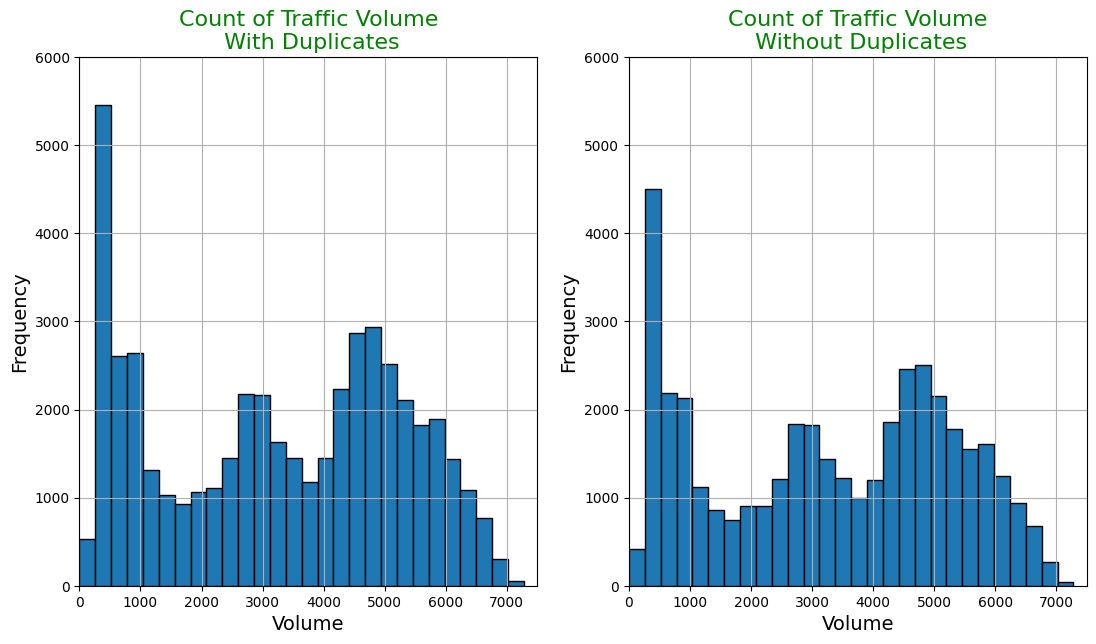

In [232]:
#follow initial steps of this project to see if the month of July has changed with dropped duplicates vs. the orginal dataframe


#original dataframe with duplicates

plt.figure(figsize = (13,7))

plt.subplot(1,2,1)
plt.hist(metro_traffic['traffic_volume'],bins = 28,edgecolor = 'black')
plt.grid()
plt.title('Count of Traffic Volume\n With Duplicates',size = 16, color = 'green')
plt.xlabel('Volume',size = 14)
plt.ylabel('Frequency',size = 14)
plt.xlim(0,7500)
plt.ylim(0,6000)



#plot traffic volume without duplicates
plt.subplot(1,2,2)
plt.hist(test_metro['traffic_volume'],bins = 28,edgecolor = 'black')
plt.grid()
plt.title('Count of Traffic Volume\n Without Duplicates',size = 16, color = 'green')
plt.xlabel('Volume',size = 14)
plt.ylabel('Frequency',size = 14)
plt.xlim(0,7500)
plt.ylim(0,6000)
plt.show()

## <center>Compare Night and Day With and Without Duplicate Entries

In [233]:
#convert the date_time column to a usable format for day and night comparisons

test_metro['date_time'] = pd.to_datetime(test_metro['date_time'])

#isolate hours 7 a.m. - 7 p.m. (day) 

day_time2 = test_metro.copy()[(test_metro['date_time'].dt.hour >=7) & (test_metro['date_time'].dt.hour <19)]
print(day_time2.shape)

#isolate hours 7 p.m. - 7 a.m.(night)

night_time2 = test_metro.copy()[(test_metro['date_time'].dt.hour >=19) | (test_metro['date_time'].dt.hour <7)]
print(night_time2.shape)

(20150, 10)
(20425, 10)


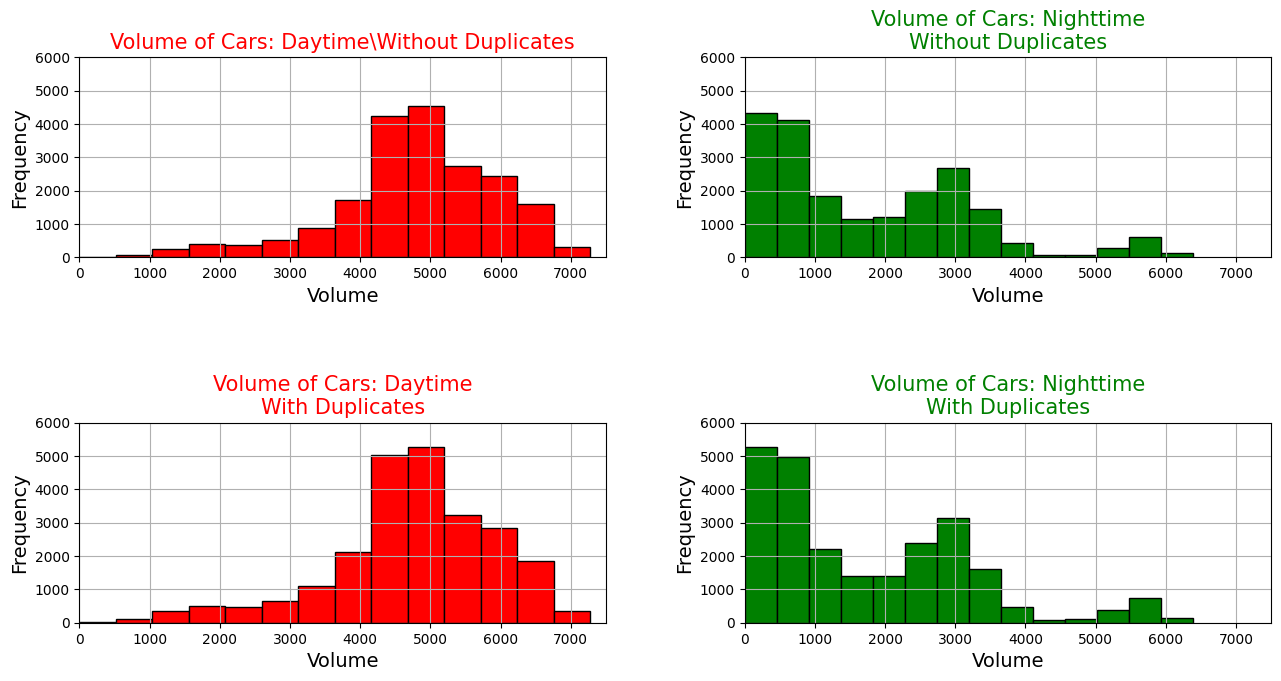

In [234]:
#create side by side histograms to illustrate the differing volumes based on time of day

plt.figure(figsize = (14,8))

#daytime after duplicates removed

plt.subplot(2,2,1)
day_time2['traffic_volume'].plot.hist(grid = True, bins = 14,color = 'red', edgecolor = 'black')
plt.title('Volume of Cars: Daytime\Without Duplicates',size = 15, color = 'red')
plt.ylabel('Frequency',size = 14)
plt.xlabel('Volume',size = 14)
plt.xlim(0,7500)
plt.ylim(0,6000)

#nightime after dupicates removed

plt.subplot(2,2,2)
plt.title('Volume of Cars: Nighttime\nWithout Duplicates',size = 15, color = 'green')
night_time2['traffic_volume'].plot.hist(grid = True, bins = 14,color = 'green', edgecolor = 'black')
plt.ylabel('Frequency',size = 14)
plt.xlabel('Volume',size = 14)
plt.xlim(0,7500)
plt.ylim(0,6000)
plt.tight_layout(pad = 5)


#daytime with duplicates
plt.subplot(2,2,3)
day_time['traffic_volume'].plot.hist(grid = True, bins = 14,color = 'red', edgecolor = 'black')
plt.title('Volume of Cars: Daytime\nWith Duplicates',size = 15, color = 'red')
plt.ylabel('Frequency',size = 14)
plt.xlabel('Volume',size = 14)
plt.xlim(0,7500)
plt.ylim(0,6000)

#nightime with duplicates
plt.subplot(2,2,4)
plt.title('Volume of Cars: Nighttime\nWith Duplicates',size = 15, color = 'green')
night_time['traffic_volume'].plot.hist(grid = True, bins = 14,color = 'green', edgecolor = 'black')
plt.ylabel('Frequency',size = 14)
plt.xlabel('Volume',size = 14)
plt.xlim(0,7500)
plt.ylim(0,6000)
plt.tight_layout(pad = 5)
plt.show()

## <center> Last Round of Comparisons

- It's starting to appear as if the removal of duplicates has had relatively small impact on the general means and volumes of the dataset as eveidenced by the minimal volume changes in the histograms above 
- Below we looked at the `day_time2['traffic_volume']` and `night_time2['traffic_volume']` and the describe function gave very similar results as the initial query.
- After this we'll finally look at the months mean average to actually see if the duplicate removal solve the mystery of a July drop off early in the analysis. 

In [235]:
#take a look at night_time2 and day_time2 to see characteristic differences

print('Daytime Without Duplicates')

day_time2['traffic_volume'].describe()

Daytime Without Duplicates


count    20150.000000
mean      4795.390471
std       1155.289855
min          0.000000
25%       4287.000000
50%       4843.000000
75%       5584.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [236]:
print('Nightime Without Duplicates')

night_time2['traffic_volume'].describe()

Nightime Without Duplicates


count    20425.000000
mean      1806.170135
std       1439.242504
min          0.000000
25%        542.000000
50%       1341.000000
75%       2841.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [237]:
#this is a quick look at how to break down months for day_time2

day_time2['month'] = day_time2['date_time'].dt.month
by_month2 = day_time2.groupby('month').mean()
by_month2['traffic_volume']
print(by_month2['traffic_volume'])

month
1     4499.587508
2     4760.772580
3     4943.922889
4     4972.462722
5     4914.630435
6     4929.326303
7     4616.634238
8     4943.619407
9     4860.859031
10    4937.358440
11    4734.511943
12    4458.936209
Name: traffic_volume, dtype: float64


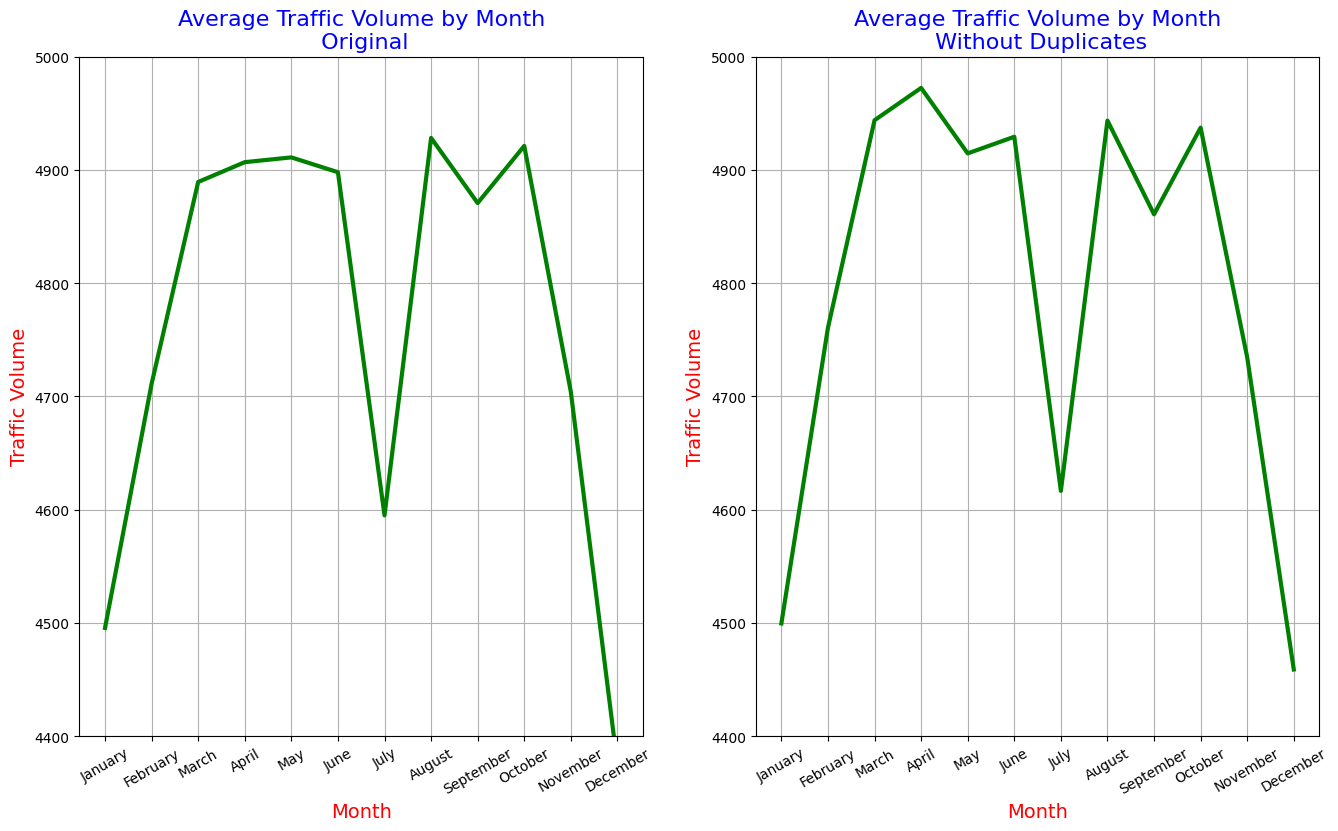

In [238]:
#generate a line plot to see how monthly traffic changed based on the means created 

plt.figure(figsize = (16,9))

#with duplicates

plt.subplot(1,2,1)
plt.plot(by_month['traffic_volume'],color ='g',linewidth = 3)
plt.grid()
plt.ylim(4400,5000)
plt.xlabel('Month',size = 14, color = 'r')
plt.ylabel('Traffic Volume',size = 14, color = 'r')
plt.title('Average Traffic Volume by Month\n Original',size = 16, color = 'blue')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'],rotation= 30)

#without duplicates

plt.subplot(1,2,2)
plt.plot(by_month2['traffic_volume'],color ='g',linewidth = 3)
plt.grid()
plt.ylim(4400,5000)
plt.xlabel('Month',size = 14, color = 'r')
plt.ylabel('Traffic Volume',size = 14, color = 'r')
plt.title('Average Traffic Volume by Month\n Without Duplicates',size = 16, color = 'blue')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'],rotation= 30)
plt.show()

## Finishing the Analysis After a Detour 

- From here it's time to move on to the last part of the project, but it should be noted that this process is emblematic of the kind of detail needed to look at the data and how to answer questions that may be overlooked and could maybe change the way the data is not only viewed but interpreted.

- Let's look at weather descriptors to see if they had any significant impact on traffic volume

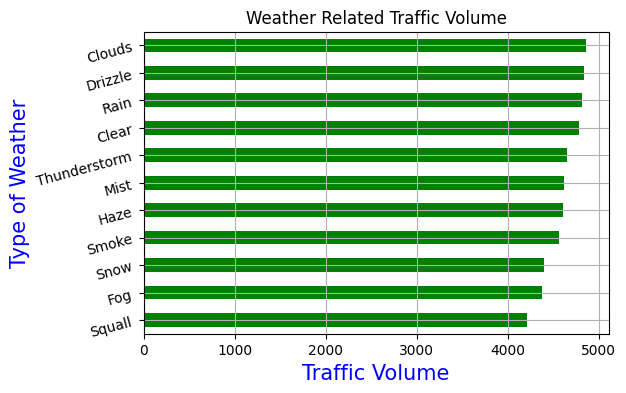

In [239]:
#now that we've gone over numerical weather factors, let's group descriptive factors, find their means
#based on frequency and plot them to see if they may have additonal effects on traffic volume

#create mean statistics

by_weather_main = day_time.groupby('weather_main').mean()
by_weather_description = day_time.groupby('weather_description').mean()

by_weather_main['traffic_volume'].sort_values().plot.barh(color = 'g',grid = True)
plt.xlabel('Traffic Volume', size = 15,color = 'blue')
plt.ylabel('Type of Weather', size = 15, color = 'blue')
plt.title('Weather Related Traffic Volume')
plt.yticks(rotation = 15, size = 10)
plt.show()

<br>When exploring by `weather_main['traffic_volume']` it doesnt appear that any particular type of weather pattern adversely affects traffic volume.  No category exceeds 5000, suggesting, again, that traffic volume is heavily influenced by time of week and day.  To see if this holds true we'll take one more look at some descriptive characteristics to see if there's anything we may have missed related to weather.

<br>

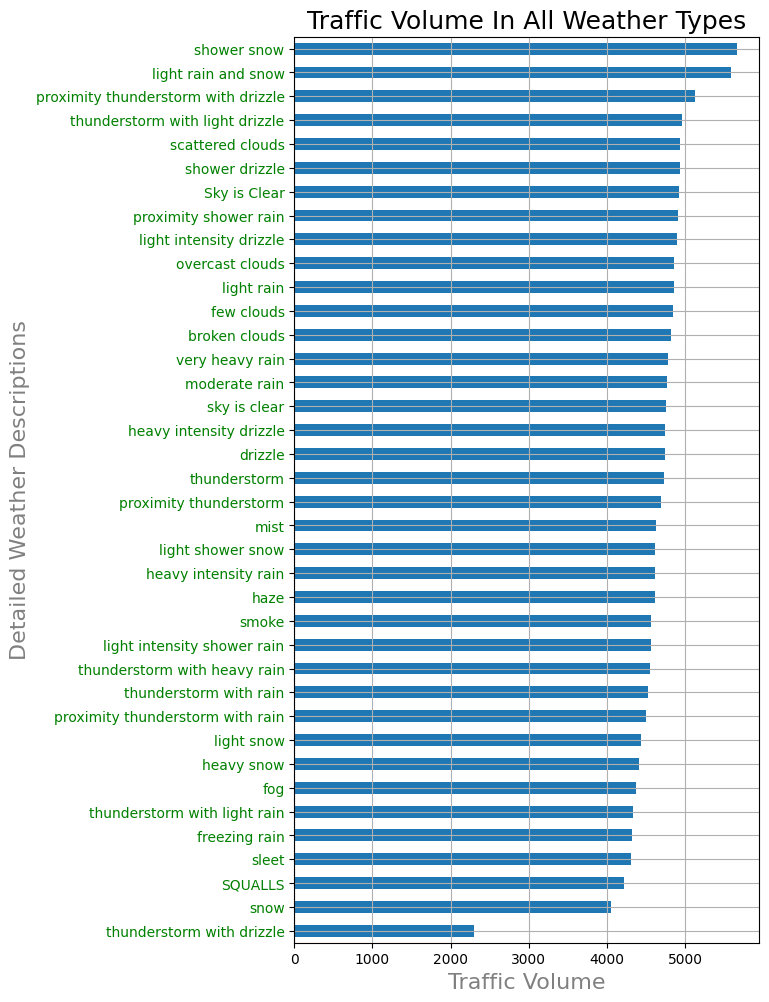

In [240]:
#Looking into by_weather_description to see if any other evidence presents iteself
plt.figure(figsize =(6,12))
by_weather_description['traffic_volume'].sort_values().plot.barh(grid = True)
plt.title('Traffic Volume In All Weather Types',size = 18)
plt.xlabel('Traffic Volume',size = 16, color = 'grey')
plt.ylabel('Detailed Weather Descriptions',size = 16, color = 'grey')
plt.yticks(color = 'green')
plt.show()

## Conclusions

- Viewing a more detailed listing of volumes against a well varied weather set shows that only snow, mixed rain/snow and proximity thunderstorms show values over 5,000.  Intuitively, this makes sense.  If it's snowing, traffic generally slows down due to adverse roadway conditions.  The same is true for heavy rain and proximal thunderstorms.  However, their values are not significant enough to draw sound conclusions to their overall impact on volume.  This can easily be reinforced by revisting the `day_time['traffic_volume]` mean derived at the begning of the project (pictured below)  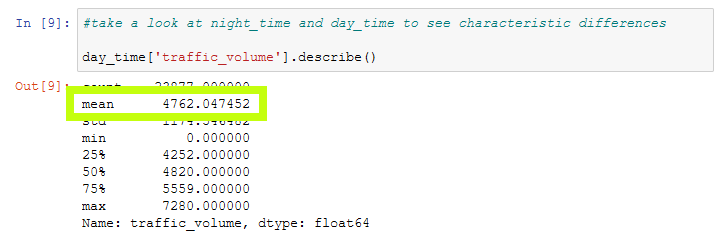 
- This tells us that the average volume of traffic doesn't change significantly across the dataframe despite the varied factors that could play a role in increasing or decreasing volume.  

- While these results are not exhaustive they paint a picture of traffic being most heavily affected by time of week and day.  It was nice to dig into the rainstorm and roadwork data as well as the exclustion of duplicate records, but ultimately none of those had significant enough impacts (in this analysis) to prove otherwise.  The only question that wasn't specifically answered was the dip in volume for winter months and July. Perhaps a fluke or a statistical observation at this end. For now we can say with a decent amount of certaintly, that travelling Westbound on I-94 between St. Paul and Minneapolis  one can expect heavier traffic Mon-Fri between 7-9 am and 4-6 pm.  This dataset was a lot of fun to work with and still holds tons of information.  Specifically, determining a more detailed account of repeating date_time values and traffic_volumes.